# Investigate the Quality of Flower102

In [1]:
!pip install torchvision scienceplots einops torchinfo randomname seaborn -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
from torchvision import datasets

# TODO: replace with package after public on PyPi
import sys

sys.path.append("../")

from src.cleaner.selfclean import PretrainingType, SelfClean

In [3]:
dataset = datasets.Flowers102(root='./tmp', download=True)

Will run the code on one GPU.
STARTUP | distributed init (rank 0): env://


/home/fabian/.local/lib/python3.9/site-packages/torchvision/transforms/transforms.py:899: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Running on: cuda
Run directory of model: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-Flowers102-international-fork
Data loaded: there are 1020 train images, 32 batches, and a batch size of 64.
Single GPU detected, model will run on single instance.
Single GPU detected, model will run on single instance.
Student and Teacher are built: they are both vit_tiny network.
Pre-trained weights not found. Training from scratch.


Epoch: 50, Train loss: 7.922376, Train stud/teach acc: 0.0000:  49%|██████████████████████████████████████████████████████████████████████████▉                                                                              | 49/100 [20:51<20:35, 24.22s/it]

Saving checkpoint: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-Flowers102-international-fork/checkpoints/checkpoint-epoch50.pth ...


Epoch: 50, Train loss: 7.922376, Train stud/teach acc: 0.0000:  50%|████████████████████████████████████████████████████████████████████████████▌                                                                            | 50/100 [20:52<20:23, 24.46s/it]

Saving current best: model_best.pth ...


Epoch: 100, Train loss: 7.131295, Train stud/teach acc: 0.0357:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99/100 [41:02<00:25, 25.26s/it]

Saving checkpoint: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-Flowers102-international-fork/checkpoints/checkpoint-epoch100.pth ...


Epoch: 100, Train loss: 7.131295, Train stud/teach acc: 0.0357: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [41:03<00:00, 24.63s/it]


Saving current best: model_best.pth ...


Processing possible near duplicates: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 97.51it/s]


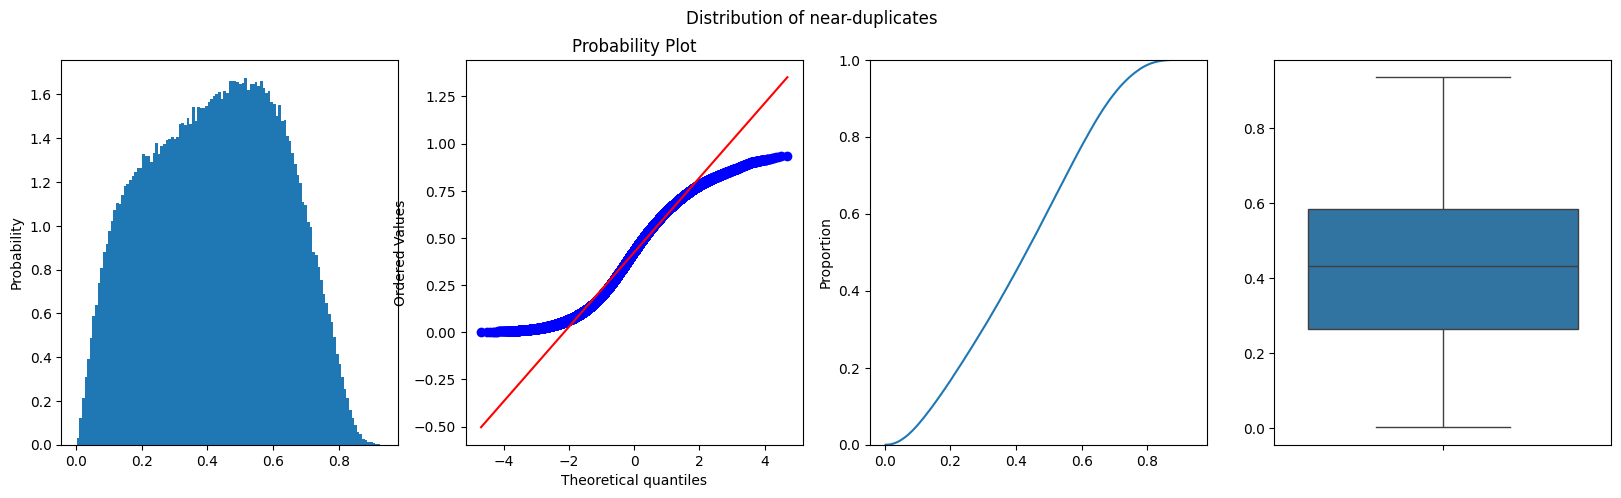

Processing possible irrelevant samples: 2039it [00:00, 33840.02it/s]


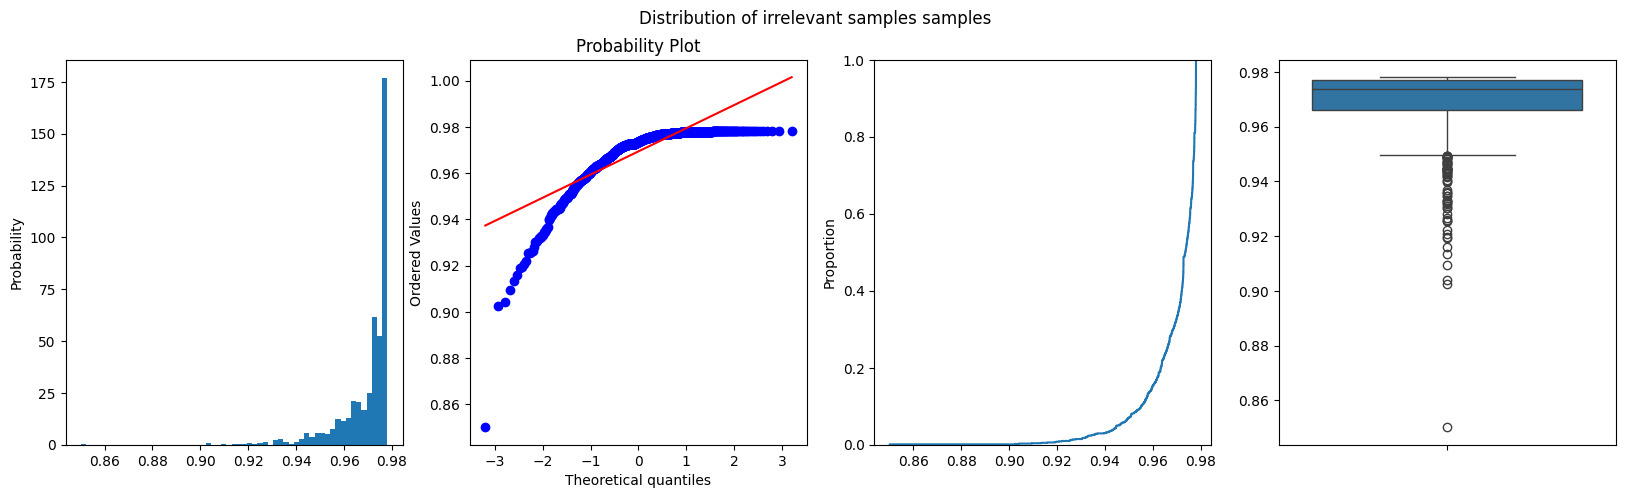

/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../src/cleaner/label_errors/intra_extra_distance_mixin.py:30: RuntimeWarning: invalid value encountered in multiply
  min_same = np.nanmin((o_hot_same * self.distance_matrix), axis=-1)
/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../src/cleaner/label_errors/intra_extra_distance_mixin.py:31: RuntimeWarning: invalid value encountered in multiply
  min_diff = np.nanmin((o_hot_diff * self.distance_matrix), axis=-1)


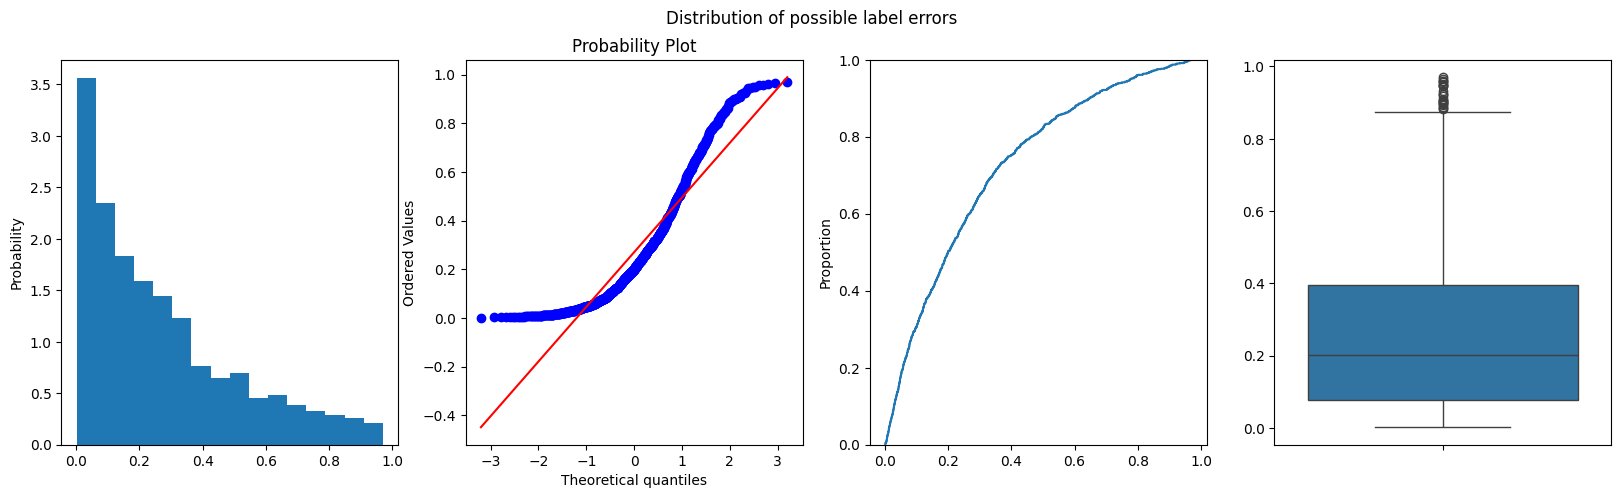

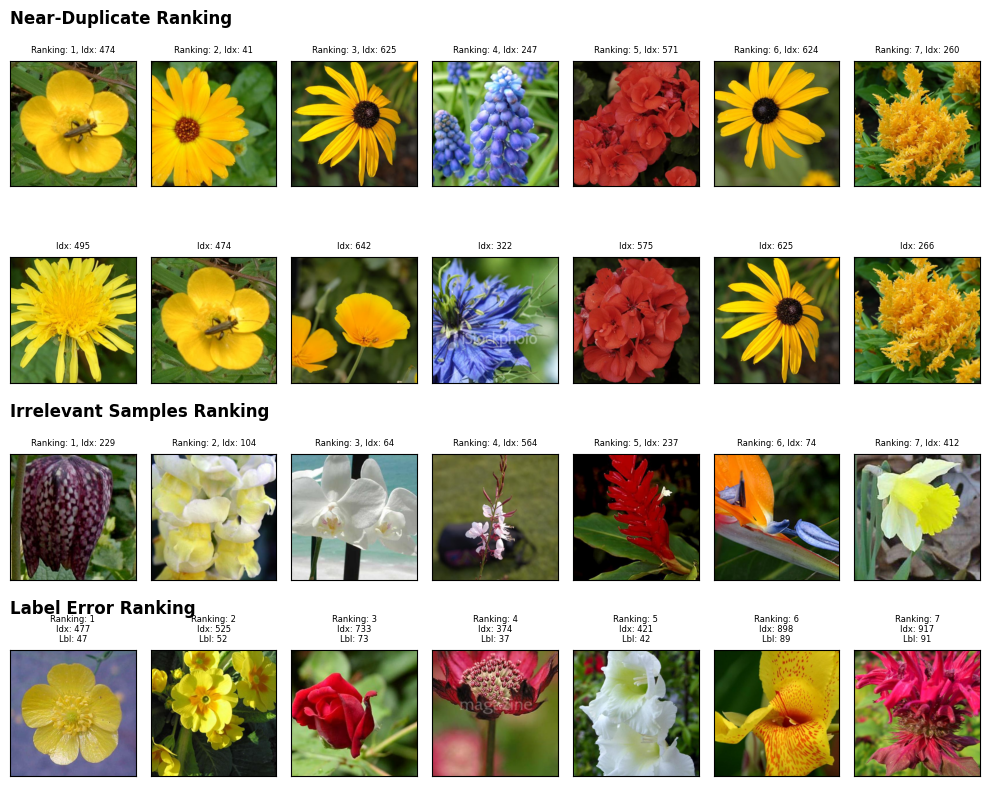

In [4]:
selfclean = SelfClean(
    auto_cleaning=True,
    plot_distribution=True,
    plot_top_N=7,
)
out_dict = selfclean.run_on_dataset(
    dataset=dataset,
    pretraining_type=PretrainingType.DINO,
    num_workers=10,
)

In [5]:
out_dict

{'irrelevants': {'indices': array([229, 104,  64, ...,  41, 474, 495]),
  'scores': array([0.85013994, 0.90243568, 0.90410745, ..., 0.97804443, 0.97804443,
         0.97804443]),
  'auto_issues': array([0])},
 'near_duplicates': {'indices': array([[ 474,  495],
         [  41,  474],
         [ 625,  642],
         ...,
         [ 743,  884],
         [ 264,  328],
         [ 328, 1004]], dtype=int32),
  'scores': array([0.0020386 , 0.00261122, 0.00315964, ..., 0.9294101 , 0.9319233 ,
         0.9352418 ], dtype=float32),
  'auto_issues': array([], dtype=int64)},
 'label_errors': {'indices': array([477, 525, 733, ..., 571, 864, 575]),
  'scores': array([0.00146588, 0.001686  , 0.00173101, ..., 0.95953497, 0.96469747,
         0.97030684]),
  'auto_issues': array([], dtype=int64)}}